In [11]:
from pylab import *
from numpy import *

## Power Iteration Method

In [20]:
A = array([[1,-1,-1],[3,1j,1],[-3,1,-1]])
n=len(A)

print("A=")
print(A)

X= random.rand(n)

l1=0

while True:
    Y = A @ X
    Y=Y/norm(Y)
    l=vdot(Y,(A@Y))/ vdot(Y,Y)

    if abs(l-l1)<10**-8:
        break
    X=Y
    l1=l
    
print("\nDominant Eigenvalue=")
print(l.round(decimals=4),'\n')
print(eig(A)[0].round(decimals=5),"\n")

print("\nDominant Eigenvector=")
print((Y/norm(Y)).round(decimals=4),'\n')
print(eig(A)[1].round(decimals=4))

A=
[[ 1.+0.j -1.+0.j -1.+0.j]
 [ 3.+0.j  0.+1.j  1.+0.j]
 [-3.+0.j  1.+0.j -1.+0.j]]

Dominant Eigenvalue=
(-2-0j) 

[-2.    -0.j      1.4188-0.6939j  0.5812+1.6939j] 


Dominant Eigenvector=
[ 0.1149+0.0492j -0.4924+0.197j   0.8371-0.0492j] 

[[ 0.1118+0.0559j  0.5956+0.j      0.2448+0.2922j]
 [-0.5031+0.1677j  0.3461+0.4133j  0.8423+0.j    ]
 [ 0.8385+0.j     -0.5956-0.j     -0.2448-0.2922j]]


## Generalization 

In [3]:
def genpower(A):
    
    n=len(A)
    
    eigval=zeros(n)
    eigvec=zeros((n,n))
    dom=zeros((n,n))
    
    for i in range(0,n):

        lambda1=0.0

        X= array([random.rand(n)]).T

        c=1

        while(True):
            lambda_ = X.flat[abs(X).argmax()]
            Y = X/lambda_
            X=dot(A,Y)

            if abs(lambda_-lambda1)<10**-5:
                break
            lambda1=lambda_

            c=c+1

        eigval[i]=lambda_
        Y=Y/norm(Y)

        dom[:,i]=Y[:,0]
        G=dom[:,i]

        for j in range(0,i):
            G=(eigval[i]-eigval[i-j-1])*G+eigval[i-j-1]*dot(dom[:,i-j-1].T,G)*dom[:,i-j-1]
            G=G/norm(G)

        eigvec[:,i]=G

        A = A - lambda_*dot(Y,Y.T)
    
    idx = eigval.argsort()

    eigval = eigval[idx]
    eigvec = eigvec[:,idx]
    
    return array(eigval),array(eigvec)

In [4]:
A=array([[19,-1,-2,2,0.5],[-1,5,-1,-2,1],[-2,-1,2,-1,5],[2,-2,-1,3,0.1],[50,-1,-2,2,2]])

eigval,eigvec=genpower(A)
 
print("Eigenvalues of A:")
print(eigval,'\n')

print("Eigenvectors of A:")
print(eigvec,'\n')

Eigenvalues of A:
[-2.41665818  1.03897643  5.94984523  7.30353093 19.12428811] 

Eigenvectors of A:
[[ 0.0756937   0.00198436 -0.06855805  0.11078976  0.3227915 ]
 [ 0.24533546 -0.45575863  0.30685997  0.09729855  0.02195142]
 [ 0.76365344 -0.50719211 -0.75946594  0.65348759  0.22738044]
 [ 0.21379957 -0.71858827 -0.01637068 -0.12858963  0.02890691]
 [-0.55245284 -0.13662795 -0.56928045  0.73121631  0.91803394]] 



## Quantum Harmonic Oscillator

In [5]:
N=100
xi,xf=-6,6
X=linspace(xi,xf,N)
delta=(xf-xi)/N

In [6]:
def U(y):            # dimensionless potential function
    return y**2

In [7]:
T = diag(-2*X**0,0) + diag(X[1:N]**0,-1) + diag(X[1:N]**0,1)    # double derivative tri-diagonal matrix

P = diag(U(X))                      # potential diagonal matrix

H = T/(-delta**2) + P               # Hermitian Matrix

H_eigenvalues, H_eigenvectors = genpower(H)
H_eigenvectors /= -sqrt(N*delta)

mod=[H_eigenvectors[:,i] @ H_eigenvectors[:,i].conj().T for i in range(0,N)]

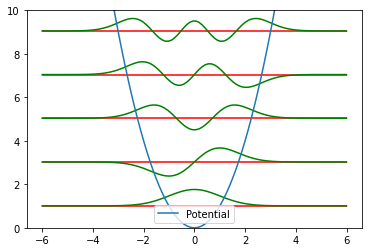

In [10]:
n=5

plot(X,10*H_eigenvectors[:,0:n]+H_eigenvalues[0:n],color="green")
plot(X,U(X),label="Potential")
hlines(H_eigenvalues[0:n],xmin=min(X),xmax=max(X),color="red")
ylim(0,10)
legend()